# Final Project

**Due date: 06-December-2024**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

## Democracy and Dictatorship

I used the data from [tidytuesday 2024/11/05](https://github.com/rfordatascience/tidytuesday/tree/master/data/2024/2024-11-05#democracy-and-dictatorship) to explore the democracy and dictatorship all over the world.

In [1]:
library('tidyverse')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


**Step 1: take a look at the data, explore how many different kinds of regime in the data**

In [35]:
#load dataset
democracy_data <-read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-11-05/democracy_data.csv',
show_col_types = FALSE)
#head(democracy_data)
glimpse(democracy_data)

democracy_data |>
count(regime_category)

Rows: 14,768
Columns: 43
$ country_name                <chr> "Afghanistan", "Afghanistan", "Afghanistan…
$ country_code                <chr> "AFG", "AFG", "AFG", "AFG", "AFG", "AFG", …
$ year                        <dbl> 1950, 1951, 1952, 1953, 1954, 1955, 1956, …
$ regime_category_index       <dbl> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, …
$ regime_category             <chr> "Royal dictatorship", "Royal dictatorship"…
$ is_monarchy                 <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, …
$ is_commonwealth             <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, …
$ monarch_name                <chr> "Mohammed Zahir Shah", "Mohammed Zahir Sha…
$ monarch_accession_year      <dbl> 1933, 1933, 1933, 1933, 1933, 1933, 1933, …
$ monarch_birthyear           <dbl> 1914, 1914, 1914, 1914, 1914, 1914, 1914, …
$ is_female_monarch           <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, …
$ is_democracy                <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, …
$ is_presidenti

regime_category,n
<chr>,<int>
Administered by British military,3
British Dependent Territory,118
British Overseas Territory,76
British Protectorate,46
British Protectorate (Northern Rhodesia and Nyasaland),12
British Protectorate (Nyasaland),3
British colony,28
British protected state,20
Civilian dictatorship,2998


**Step 2: list top 10 regime all over the world, find the most popular regime, and highlight the regime of United States**

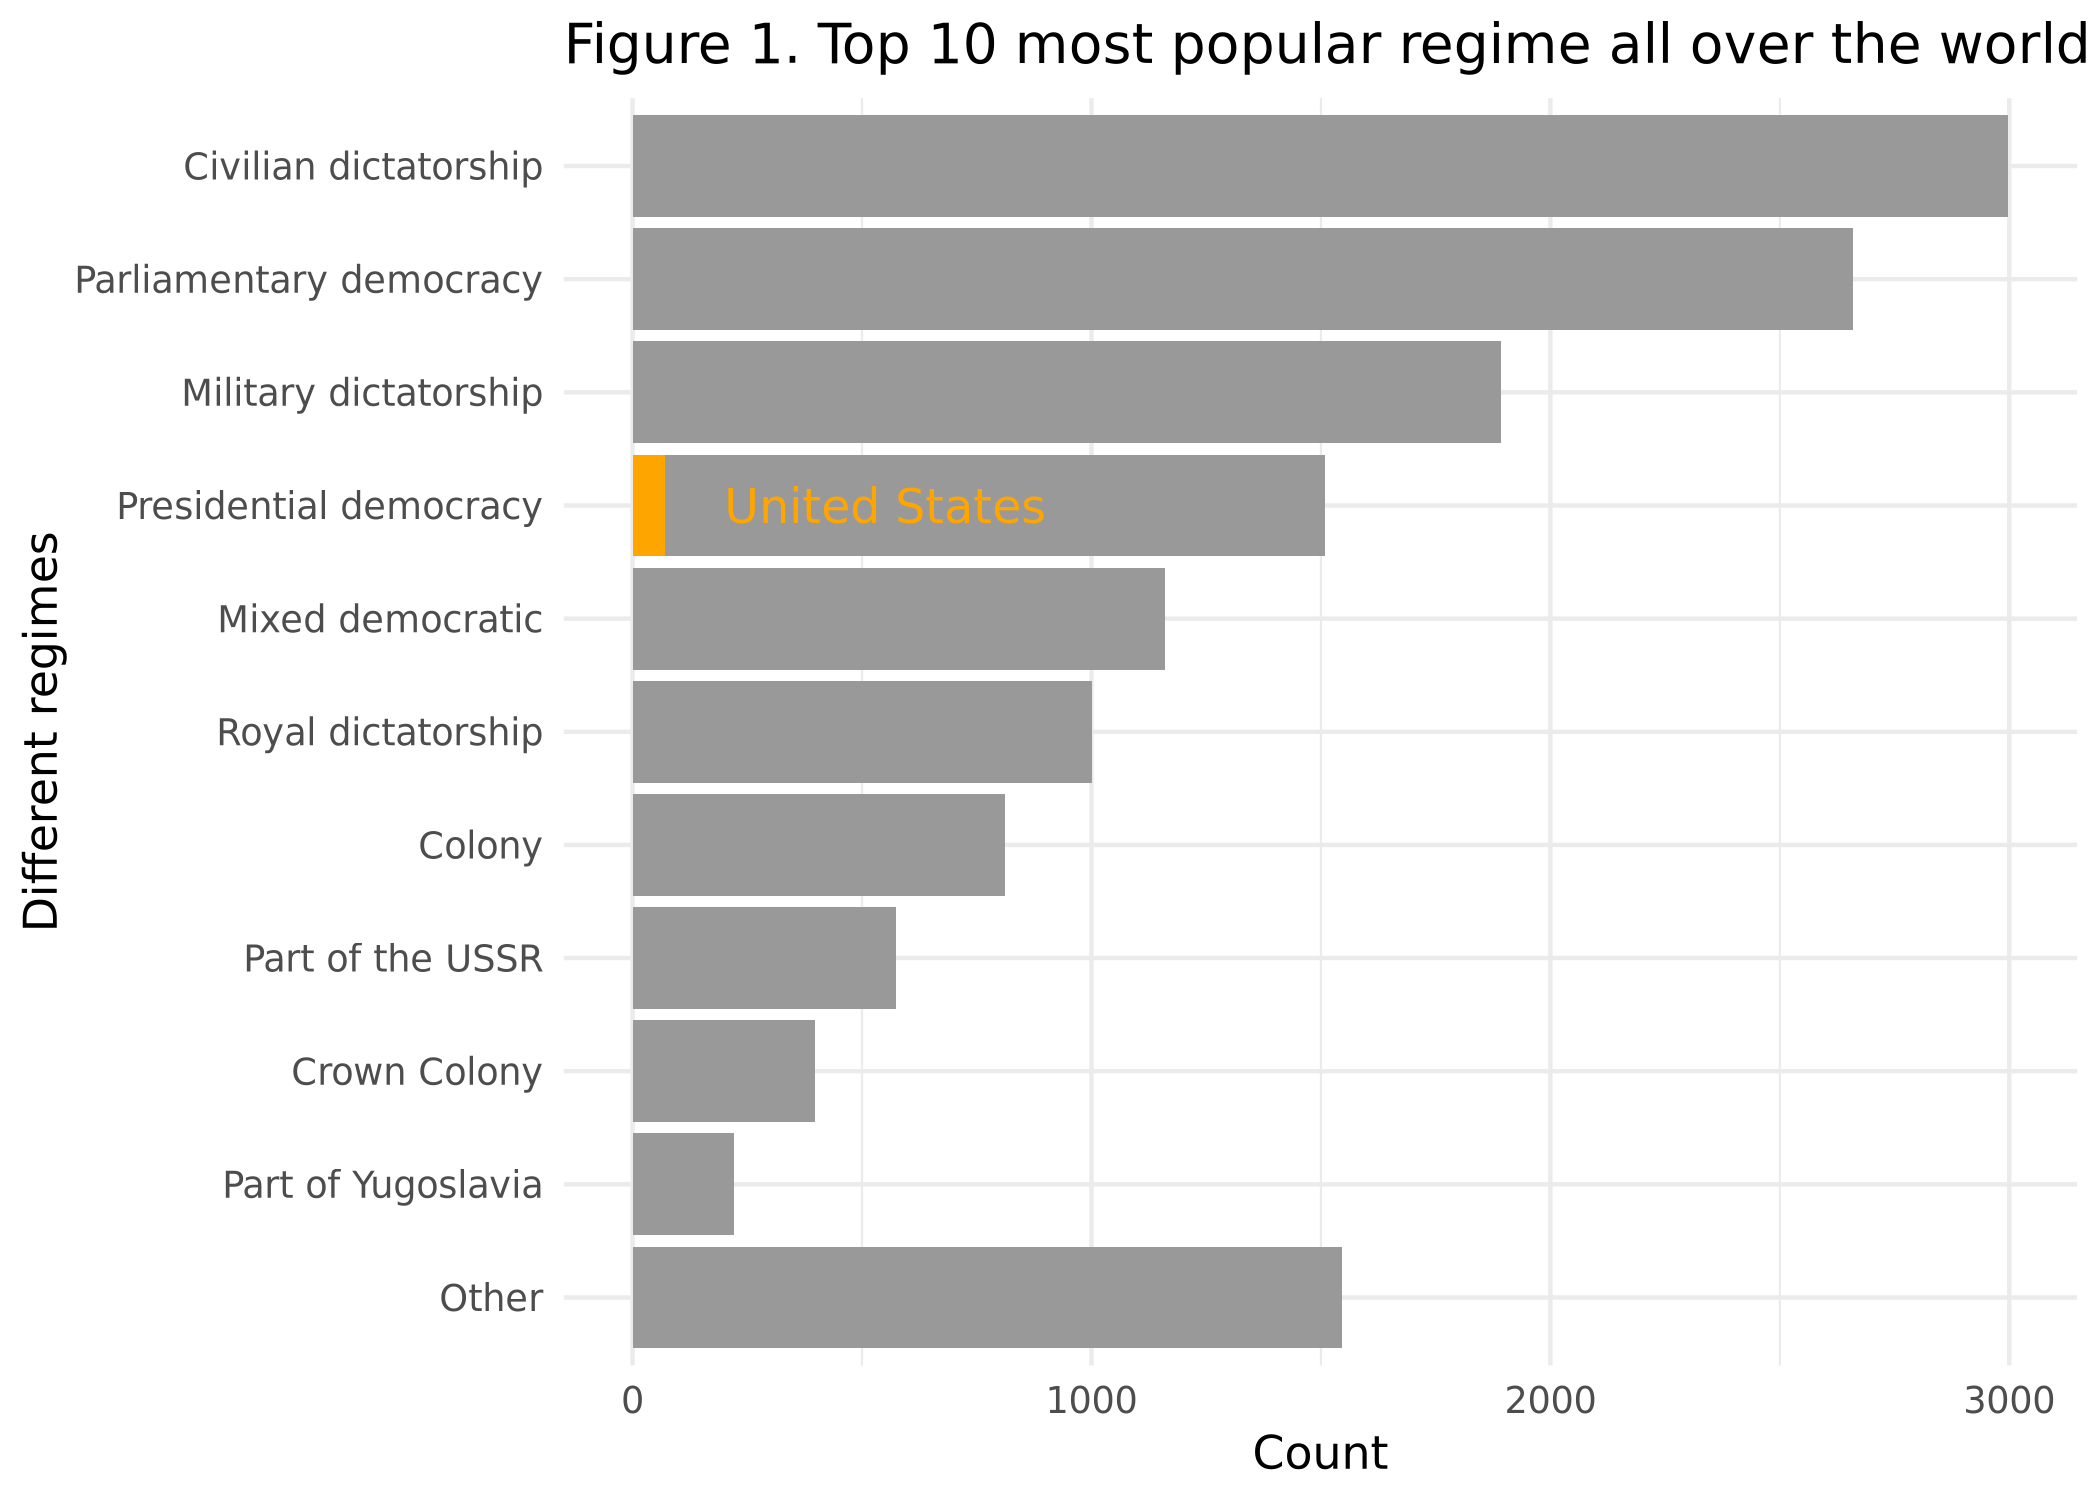

In [44]:
options(repr.plot.width = 7, repr.plot.height = 5, repr.plot.res = 300)
democracy_sort<-democracy_data|>
filter(regime_category!='NA') |>
mutate(regime_category=regime_category |> fct_infreq() |> fct_lump(n = 10)|>fct_rev())
ggplot(democracy_sort, aes(y=regime_category))+
geom_bar(fill='gray60')+
geom_bar(fill='orange', data=democracy_sort|>filter(country_name=='United States'))+
annotate("text", x = 200, y = "Presidential democracy", label = "United States", 
           color = "orange", hjust = 0, size=4)+
labs(x = "Count", y = "Different regimes",title = "Figure 1. Top 10 most popular regime all over the world")+
theme_minimal()

**Civilian dictatorship** is the most popular regime in the world. The regime of United States is **presidential democracy**. 

**Step 3: list the elected US presidents after 1980**

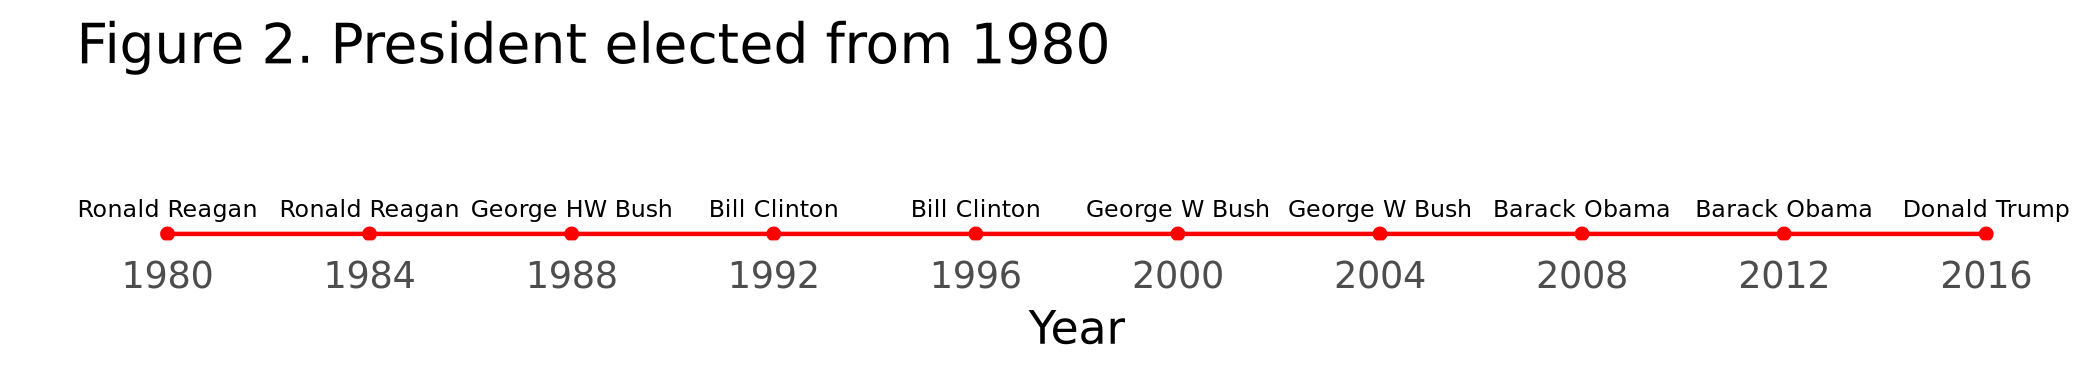

In [39]:
#restrict to US only
us_democracy<- democracy_data|>
filter(country_name=="United States",election_year!='NA', year>1980)
options(repr.plot.width = 7, repr.plot.height = 1.25, repr.plot.res = 300)

ggplot(us_democracy,aes(x=election_year, y=0))+
geom_point(size=1,color='red')+
geom_line(size=0.5,color='red')+#,linetype = "dashed"
geom_text(aes(label = president_name),  
            vjust = -1, hjust = 0.5, 
            size = 2) +         
  scale_y_continuous(limits = c(0, 0.1), 
                     breaks = NULL) +    
  scale_x_continuous(limits = c(1980, 2016), 
                     breaks = seq(1980, 2016, by = 4)) + 
  labs(x = "Year", y = "", title = "Figure 2. President elected from 1980", size=3) +
  theme_minimal() +                      
  theme(axis.text.y = element_blank(),    
        axis.ticks.y = element_blank(),
        panel.grid = element_blank()
       )
